# Fold 1

In [31]:
mypath1 = 'Datasets/Fold1/'
mydtaframes1 = {}

for index,files in enumerate(os.listdir(mypath1)):
    mydtaframes1["df_{}".format(index)] = pd.read_excel('{}/{}'.format(mypath1, files),
                                                         sheet_name= 'Sheet1')

In [32]:
studiodf1 = {}

for index,frames in enumerate(mydtaframes1):
    studiodf1["{}".format(index)] = mydtaframes1[frames]

In [33]:
for frames in studiodf1:
    studiodf1[frames].fillna(method='ffill', inplace= True)

In [34]:
allData1 = pd.concat([studiodf1['0'],studiodf1['1'],studiodf1['2'],studiodf1['3'],studiodf1['4']
                     ,studiodf1['5'],studiodf1['6'],studiodf1['7'],studiodf1['8'],studiodf1['9']
                     ,studiodf1['10'],studiodf1['11'],studiodf1['12'],studiodf1['13'],studiodf1['14']], sort = False)
allData1['GazePointX (MCSpx)'].fillna(method='bfill', inplace= True)
allData1['GazePointY (MCSpx)'].fillna(method='bfill', inplace= True)

In [35]:
allData1['GazePointX (MCSpx)'] = allData1['GazePointX (MCSpx)'].diff()
allData1['GazePointY (MCSpx)'] = allData1['GazePointY (MCSpx)'].diff()
allData1['GazePointX (MCSpx)'].fillna(method='bfill', inplace= True)
allData1['GazePointY (MCSpx)'].fillna(method='bfill', inplace= True)


In [36]:
readingData1 = allData1.loc[allData1['StudioEventTypeDiff'] == "Agree_3_Reading"]
skimmingData1 = allData1.loc[allData1['StudioEventTypeDiff'] == "Agree_2_Skimming"]
scanningData1 = allData1.loc[allData1['StudioEventTypeDiff'] == "Agree_1_Scanning"]
unknownData1 = allData1.loc[allData1['StudioEventTypeDiff'] == "Agree_5_Unknown"]
mediaViewData1 = allData1.loc[allData1['StudioEventTypeDiff'] == "Agree_4_MediaView"]

In [38]:
allData1['StudioEventTypeDiff'].unique()

array(['Agree_0_unstated', 'Disagree_5_Unknown_0_unstated',
       'Disagree_5_Unknown_3_Reading', 'Disagree_1_Scanning_3_Reading',
       'Disagree_1_Scanning_5_Unknown', 'Agree_5_Unknown',
       'Disagree_5_Unknown_1_Scanning', 'Agree_1_Scanning',
       'Agree_3_Reading', 'Disagree_1_Scanning_2_Skimming',
       'Disagree_5_Unknown_2_Skimming', 'Agree_2_Skimming',
       'Disagree_1_Scanning_4_MediaView',
       'Disagree_2_Skimming_1_Scanning', 'Disagree_2_Skimming_5_Unknown',
       'Disagree_2_Skimming_3_Reading', 'Disagree_5_Unknown_4_MediaView',
       'Agree_4_MediaView', 'Disagree_4_MediaView_1_Scanning',
       'Disagree_0_unstated_3_Reading', 'Disagree_3_Reading_1_Scanning',
       'Disagree_3_Reading_2_Skimming', 'Disagree_2_Skimming_4_MediaView',
       'Disagree_3_Reading_4_MediaView',
       'Disagree_4_MediaView_2_Skimming',
       'Disagree_4_MediaView_5_Unknown', 'Disagree_3_Reading_5_Unknown',
       'Disagree_1_Scanning_0_unstated', 'Disagree_4_MediaView_3_Reading

In [39]:
readCovMat1 = np.cov((readingData1['GazePointX (MCSpx)'],readingData1['GazePointY (MCSpx)']))
skimmingCovMat1 = np.cov((skimmingData1['GazePointX (MCSpx)'],skimmingData1['GazePointY (MCSpx)']))
scanningCovMat1 = np.cov((scanningData1['GazePointX (MCSpx)'],scanningData1['GazePointY (MCSpx)']))
unknownCovMat1 = np.cov((unknownData1['GazePointX (MCSpx)'],unknownData1['GazePointY (MCSpx)']))
mediaViewCovMat1 = np.cov((mediaViewData1['GazePointX (MCSpx)'],mediaViewData1['GazePointY (MCSpx)']))

display(readCovMat1)
display(skimmingCovMat1)
display(scanningCovMat1)
display(unknownCovMat1)
display(mediaViewCovMat1)

array([[1347.17819715,  156.69893621],
       [ 156.69893621,  829.62864116]])

array([[1496.0804431 ,  275.10679035],
       [ 275.10679035, 1866.72643479]])

array([[1845.35660031,  278.6600628 ],
       [ 278.6600628 , 1534.86548357]])

array([[2151.34052549,  752.7431546 ],
       [ 752.7431546 , 2846.0843203 ]])

array([[1588.30018404, -328.80130858],
       [-328.80130858, 1247.88343492]])

In [40]:
readingMeanx1 = readingData1['GazePointX (MCSpx)'].mean()
readingMeany1 = readingData1['GazePointY (MCSpx)'].mean()
readingMeanVector1 = [readingMeanx1,readingMeany1]

skimmingMeanx1 = skimmingData1['GazePointX (MCSpx)'].mean()
skimmingMeany1 = skimmingData1['GazePointY (MCSpx)'].mean()
skimmingMeanVector1 = [skimmingMeanx1,skimmingMeany1]

scanningMeanx1 = scanningData1['GazePointX (MCSpx)'].mean()
scanningMeany1 = scanningData1['GazePointY (MCSpx)'].mean()
scanningMeanVector1 = [scanningMeanx1,scanningMeany1]

unknownMeanx1 = unknownData1['GazePointX (MCSpx)'].mean()
unknownMeany1 = unknownData1['GazePointY (MCSpx)'].mean()
unknownMeanVector1 = [unknownMeanx1,unknownMeany1]

mediaViewMeanx1 = mediaViewData1['GazePointX (MCSpx)'].mean()
mediaViewMeany1 = mediaViewData1['GazePointY (MCSpx)'].mean()
mediaViewMeanVector1 = [mediaViewMeanx1,mediaViewMeany1]

display(readingMeanVector1)
display(skimmingMeanVector1)
display(scanningMeanVector1)
display(unknownMeanVector1)
display(mediaViewMeanVector1)

[-0.0007981869752989638, 0.08868427429125272]

[-0.0046466128637808754, -0.8479457079970653]

[0.07340473781530196, 0.001639744618497715]

[-0.002489527353616831, 0.0640104778437263]

[-1.0391618000687048, 0.15080728272071453]

# Fold 2

In [41]:
mypath2 = 'Datasets/Fold2/'
mydtaframes2 = {}

for index,files in enumerate(os.listdir(mypath2)):
    mydtaframes2["df_{}".format(index)] = pd.read_excel('{}/{}'.format(mypath2, files),
                                                         sheet_name= 'Sheet1')

In [42]:
studiodf2 = {}

for index,frames in enumerate(mydtaframes2):
    studiodf2["{}".format(index)] = mydtaframes2[frames]

In [43]:
for frames in studiodf2:
    studiodf2[frames].fillna(method='ffill', inplace= True)

In [44]:
allData2 = pd.concat([studiodf2['0'],studiodf2['1'],studiodf2['2'],studiodf2['3'],studiodf2['4']
                     ,studiodf2['5'],studiodf2['6'],studiodf2['7'],studiodf2['8'],studiodf2['9']
                     ,studiodf2['10'],studiodf2['11'],studiodf2['12'],studiodf2['13'],studiodf2['14']], sort = False)
allData2['GazePointX (MCSpx)'].fillna(method='bfill', inplace= True)
allData2['GazePointY (MCSpx)'].fillna(method='bfill', inplace= True)

In [45]:
allData2['GazePointX (MCSpx)'] = allData2['GazePointX (MCSpx)'].diff()
allData2['GazePointY (MCSpx)'] = allData2['GazePointY (MCSpx)'].diff()
allData2['GazePointX (MCSpx)'].fillna(method='bfill', inplace= True)
allData2['GazePointY (MCSpx)'].fillna(method='bfill', inplace= True)


In [46]:
readingData2 = allData2.loc[allData2['StudioEventTypeDiff'] == "Agree_3_Reading"]
skimmingData2 = allData2.loc[allData2['StudioEventTypeDiff'] == "Agree_2_Skimming"]
scanningData2 = allData2.loc[allData2['StudioEventTypeDiff'] == "Agree_1_Scanning"]
unknownData2 = allData2.loc[allData2['StudioEventTypeDiff'] == "Agree_5_Unknown"]
mediaViewData2 = allData2.loc[allData2['StudioEventTypeDiff'] == "Agree_4_MediaView"]

In [47]:
readCovMat2 = np.cov((readingData2['GazePointX (MCSpx)'],readingData2['GazePointY (MCSpx)']))
skimmingCovMat2 = np.cov((skimmingData2['GazePointX (MCSpx)'],skimmingData2['GazePointY (MCSpx)']))
scanningCovMat2 = np.cov((scanningData2['GazePointX (MCSpx)'],scanningData2['GazePointY (MCSpx)']))
unknownCovMat2 = np.cov((unknownData2['GazePointX (MCSpx)'],unknownData2['GazePointY (MCSpx)']))
mediaViewCovMat2 = np.cov((mediaViewData2['GazePointX (MCSpx)'],mediaViewData2['GazePointY (MCSpx)']))

display(readCovMat2)
display(skimmingCovMat2)
display(scanningCovMat2)
display(unknownCovMat2)
display(mediaViewCovMat2)

array([[1253.01740257,  123.71435585],
       [ 123.71435585,  618.66574195]])

array([[1710.62134033,  197.24334165],
       [ 197.24334165, 4282.67231078]])

array([[1951.03853306,  285.34334663],
       [ 285.34334663, 1457.95684079]])

array([[2340.19585756,  624.86013029],
       [ 624.86013029, 2661.843709  ]])

array([[1779.58842175, -358.65092781],
       [-358.65092781, 1229.4491999 ]])

In [48]:
readingMeanx2 = readingData2['GazePointX (MCSpx)'].mean()
readingMeany2 = readingData2['GazePointY (MCSpx)'].mean()
readingMeanVector2 = [readingMeanx2,readingMeany2]

skimmingMeanx2 = skimmingData2['GazePointX (MCSpx)'].mean()
skimmingMeany2 = skimmingData2['GazePointY (MCSpx)'].mean()
skimmingMeanVector2 = [skimmingMeanx2,skimmingMeany2]

scanningMeanx2 = scanningData2['GazePointX (MCSpx)'].mean()
scanningMeany2 = scanningData2['GazePointY (MCSpx)'].mean()
scanningMeanVector2 = [scanningMeanx2,scanningMeany2]

unknownMeanx2 = unknownData2['GazePointX (MCSpx)'].mean()
unknownMeany2 = unknownData2['GazePointY (MCSpx)'].mean()
unknownMeanVector2 = [unknownMeanx2,unknownMeany2]

mediaViewMeanx2 = mediaViewData2['GazePointX (MCSpx)'].mean()
mediaViewMeany2 = mediaViewData2['GazePointY (MCSpx)'].mean()
mediaViewMeanVector2 = [mediaViewMeanx2,mediaViewMeany2]

display(readingMeanVector2)
display(skimmingMeanVector2)
display(scanningMeanVector2)
display(unknownMeanVector2)
display(mediaViewMeanVector2)

[0.032714022583486824, 0.09169536317770481]

[0.40427693647491414, -0.719289757608012]

[0.007770614920448872, -0.0027349091619456923]

[-0.024881482212177303, 0.1339584651003557]

[-1.0985138004246284, 0.16687898089171974]

# Fold 3

In [49]:
mypath3 = 'Datasets/Fold3/'
mydtaframes3 = {}

for index,files in enumerate(os.listdir(mypath3)):
    mydtaframes3["df_{}".format(index)] = pd.read_excel('{}/{}'.format(mypath3, files),
                                                         sheet_name= 'Sheet1')

In [50]:
studiodf3 = {}

for index,frames in enumerate(mydtaframes3):
    studiodf3["{}".format(index)] = mydtaframes3[frames]

In [51]:
for frames in studiodf3:
    studiodf3[frames].fillna(method='ffill', inplace= True)

In [52]:
allData3 = pd.concat([studiodf3['0'],studiodf3['1'],studiodf3['2'],studiodf3['3'],studiodf3['4']
                     ,studiodf3['5'],studiodf3['6'],studiodf3['7'],studiodf3['8'],studiodf3['9']
                     ,studiodf3['10'],studiodf3['11'],studiodf1['12'],studiodf3['13'],studiodf3['14']], sort = False)
allData3['GazePointX (MCSpx)'].fillna(method='bfill', inplace= True)
allData3['GazePointY (MCSpx)'].fillna(method='bfill', inplace= True)

In [53]:
allData3['GazePointX (MCSpx)'] = allData3['GazePointX (MCSpx)'].diff()
allData3['GazePointY (MCSpx)'] = allData3['GazePointY (MCSpx)'].diff()
allData3['GazePointX (MCSpx)'].fillna(method='bfill', inplace= True)
allData3['GazePointY (MCSpx)'].fillna(method='bfill', inplace= True)


In [54]:
readingData3 = allData3.loc[allData3['StudioEventTypeDiff'] == "Agree_3_Reading"]
skimmingData3 = allData3.loc[allData3['StudioEventTypeDiff'] == "Agree_2_Skimming"]
scanningData3 = allData3.loc[allData3['StudioEventTypeDiff'] == "Agree_1_Scanning"]
unknownData3 = allData3.loc[allData3['StudioEventTypeDiff'] == "Agree_5_Unknown"]
mediaViewData3 = allData3.loc[allData3['StudioEventTypeDiff'] == "Agree_4_MediaView"]

In [55]:
readCovMat3 = np.cov((readingData3['GazePointX (MCSpx)'],readingData3['GazePointY (MCSpx)']))
skimmingCovMat3 = np.cov((skimmingData3['GazePointX (MCSpx)'],skimmingData3['GazePointY (MCSpx)']))
scanningCovMat3 = np.cov((scanningData3['GazePointX (MCSpx)'],scanningData3['GazePointY (MCSpx)']))
unknownCovMat3 = np.cov((unknownData3['GazePointX (MCSpx)'],unknownData3['GazePointY (MCSpx)']))
mediaViewCovMat3 = np.cov((mediaViewData3['GazePointX (MCSpx)'],mediaViewData3['GazePointY (MCSpx)']))

display(readCovMat3)
display(skimmingCovMat3)
display(scanningCovMat3)
display(unknownCovMat3)
display(mediaViewCovMat3)

array([[1110.69096749,   98.22130447],
       [  98.22130447,  617.1137302 ]])

array([[1536.95795128,  184.99315269],
       [ 184.99315269, 3974.86292082]])

array([[1534.35520357,  166.87094344],
       [ 166.87094344, 1264.1977555 ]])

array([[2149.53627602,  708.10555101],
       [ 708.10555101, 2737.15685474]])

array([[654.73636355, -71.17187548],
       [-71.17187548, 913.97484559]])

In [56]:
readingMeanx3 = readingData3['GazePointX (MCSpx)'].mean()
readingMeany3 = readingData3['GazePointY (MCSpx)'].mean()
readingMeanVector3 = [readingMeanx3,readingMeany3]

skimmingMeanx3 = skimmingData3['GazePointX (MCSpx)'].mean()
skimmingMeany3 = skimmingData3['GazePointY (MCSpx)'].mean()
skimmingMeanVector3 = [skimmingMeanx3,skimmingMeany3]

scanningMeanx3 = scanningData3['GazePointX (MCSpx)'].mean()
scanningMeany3 = scanningData3['GazePointY (MCSpx)'].mean()
scanningMeanVector3 = [scanningMeanx3,scanningMeany3]

unknownMeanx3 = unknownData3['GazePointX (MCSpx)'].mean()
unknownMeany3 = unknownData3['GazePointY (MCSpx)'].mean()
unknownMeanVector3 = [unknownMeanx3,unknownMeany3]

mediaViewMeanx3 = mediaViewData3['GazePointX (MCSpx)'].mean()
mediaViewMeany3 = mediaViewData3['GazePointY (MCSpx)'].mean()
mediaViewMeanVector3 = [mediaViewMeanx3,mediaViewMeany3]

display(readingMeanVector3)
display(skimmingMeanVector3)
display(scanningMeanVector3)
display(unknownMeanVector3)
display(mediaViewMeanVector3)

[0.0679529459333106, 0.10794384847680781]

[0.29470533867347387, -0.5916112847145812]

[0.02510914561042369, -0.026059221390277557]

[-0.07280368525488314, 0.027861838061846257]

[-0.6114854026307347, -0.0548604427333975]

# Fold 4

In [57]:
mypath4 = 'Datasets/Fold4/'
mydtaframes4 = {}

for index,files in enumerate(os.listdir(mypath4)):
    mydtaframes4["df_{}".format(index)] = pd.read_excel('{}/{}'.format(mypath4, files),
                                                         sheet_name= 'Sheet1')

In [58]:
studiodf4 = {}

for index,frames in enumerate(mydtaframes4):
    studiodf4["{}".format(index)] = mydtaframes4[frames]

In [59]:
for frames in studiodf4:
    studiodf4[frames].fillna(method='ffill', inplace= True)

In [60]:
allData4 = pd.concat([studiodf4['0'],studiodf4['1'],studiodf4['2'],studiodf4['3'],studiodf4['4']
                     ,studiodf4['5'],studiodf4['6'],studiodf4['7'],studiodf4['8'],studiodf4['9']
                     ,studiodf4['10'],studiodf4['11'],studiodf4['12'],studiodf4['13'],studiodf4['14']], sort = False)
allData4['GazePointX (MCSpx)'].fillna(method='bfill', inplace= True)
allData4['GazePointY (MCSpx)'].fillna(method='bfill', inplace= True)

In [61]:
allData4['GazePointX (MCSpx)'] = allData4['GazePointX (MCSpx)'].diff()
allData4['GazePointY (MCSpx)'] = allData4['GazePointY (MCSpx)'].diff()
allData4['GazePointX (MCSpx)'].fillna(method='bfill', inplace= True)
allData4['GazePointY (MCSpx)'].fillna(method='bfill', inplace= True)


In [62]:
readingData4 = allData4.loc[allData4['StudioEventTypeDiff'] == "Agree_3_Reading"]
skimmingData4 = allData4.loc[allData4['StudioEventTypeDiff'] == "Agree_2_Skimming"]
scanningData4 = allData4.loc[allData4['StudioEventTypeDiff'] == "Agree_1_Scanning"]
unknownData4 = allData4.loc[allData4['StudioEventTypeDiff'] == "Agree_5_Unknown"]
mediaViewData4 = allData4.loc[allData4['StudioEventTypeDiff'] == "Agree_4_MediaView"]

In [63]:
readCovMat4 = np.cov((readingData4['GazePointX (MCSpx)'],readingData4['GazePointY (MCSpx)']))
skimmingCovMat4 = np.cov((skimmingData4['GazePointX (MCSpx)'],skimmingData4['GazePointY (MCSpx)']))
scanningCovMat4 = np.cov((scanningData4['GazePointX (MCSpx)'],scanningData4['GazePointY (MCSpx)']))
unknownCovMat4 = np.cov((unknownData4['GazePointX (MCSpx)'],unknownData4['GazePointY (MCSpx)']))
mediaViewCovMat4 = np.cov((mediaViewData4['GazePointX (MCSpx)'],mediaViewData4['GazePointY (MCSpx)']))

display(readCovMat4)
display(skimmingCovMat4)
display(scanningCovMat4)
display(unknownCovMat4)
display(mediaViewCovMat4)

array([[1209.68368031,  116.48185011],
       [ 116.48185011,  678.50471111]])

array([[1856.99852999,  196.48256553],
       [ 196.48256553, 4474.87384138]])

array([[1966.9732301 ,  288.96552874],
       [ 288.96552874, 1575.77310709]])

array([[2183.31420931,  640.46595065],
       [ 640.46595065, 2648.22112941]])

array([[1888.57658879, -493.30757922],
       [-493.30757922, 1496.92895291]])

In [64]:
readingMeanx4 = readingData4['GazePointX (MCSpx)'].mean()
readingMeany4 = readingData4['GazePointY (MCSpx)'].mean()
readingMeanVector4 = [readingMeanx4,readingMeany4]

skimmingMeanx4 = skimmingData4['GazePointX (MCSpx)'].mean()
skimmingMeany4 = skimmingData4['GazePointY (MCSpx)'].mean()
skimmingMeanVector4 = [skimmingMeanx4,skimmingMeany4]

scanningMeanx4 = scanningData4['GazePointX (MCSpx)'].mean()
scanningMeany4 = scanningData4['GazePointY (MCSpx)'].mean()
scanningMeanVector4 = [scanningMeanx4,scanningMeany4]

unknownMeanx4 = unknownData4['GazePointX (MCSpx)'].mean()
unknownMeany4 = unknownData4['GazePointY (MCSpx)'].mean()
unknownMeanVector4 = [unknownMeanx4,unknownMeany4]

mediaViewMeanx4 = mediaViewData4['GazePointX (MCSpx)'].mean()
mediaViewMeany4 = mediaViewData4['GazePointY (MCSpx)'].mean()
mediaViewMeanVector4 = [mediaViewMeanx4,mediaViewMeany4]

display(readingMeanVector4)
display(skimmingMeanVector4)
display(scanningMeanVector4)
display(unknownMeanVector4)
display(mediaViewMeanVector4)

[0.0993426873972949, 0.09000126406269751]

[0.4078805602585809, -0.6966292134831461]

[0.026479975290847318, -0.018614228353752704]

[-0.07606059919321942, 0.06723926936500023]

[-1.5108184383819379, 0.47365945437441204]

# Fold 5

In [65]:
mypath5 = 'Datasets/Fold5/'
mydtaframes5 = {}

for index,files in enumerate(os.listdir(mypath5)):
    mydtaframes5["df_{}".format(index)] = pd.read_excel('{}/{}'.format(mypath5, files),
                                                         sheet_name= 'Sheet1')

In [66]:
studiodf5 = {}

for index,frames in enumerate(mydtaframes5):
    studiodf5["{}".format(index)] = mydtaframes5[frames]

In [67]:
for frames in studiodf5:
    studiodf5[frames].fillna(method='ffill', inplace= True)

In [68]:
allData5 = pd.concat([studiodf5['0'],studiodf5['1'],studiodf5['2'],studiodf5['3'],studiodf5['4']
                     ,studiodf5['5'],studiodf5['6'],studiodf5['7'],studiodf5['8'],studiodf5['9']
                     ,studiodf5['10'],studiodf5['11'],studiodf5['12'],studiodf5['13'],studiodf5['14']], sort = False)
allData5['GazePointX (MCSpx)'].fillna(method='bfill', inplace= True)
allData5['GazePointY (MCSpx)'].fillna(method='bfill', inplace= True)

In [69]:
allData5['GazePointX (MCSpx)'] = allData5['GazePointX (MCSpx)'].diff()
allData5['GazePointY (MCSpx)'] = allData5['GazePointY (MCSpx)'].diff()
allData5['GazePointX (MCSpx)'].fillna(method='bfill', inplace= True)
allData5['GazePointY (MCSpx)'].fillna(method='bfill', inplace= True)


In [70]:
readingData5 = allData5.loc[allData5['StudioEventTypeDiff'] == "Agree_3_Reading"]
skimmingData5 = allData5.loc[allData5['StudioEventTypeDiff'] == "Agree_2_Skimming"]
scanningData5 = allData5.loc[allData5['StudioEventTypeDiff'] == "Agree_1_Scanning"]
unknownData5 = allData5.loc[allData5['StudioEventTypeDiff'] == "Agree_5_Unknown"]
mediaViewData5 = allData5.loc[allData5['StudioEventTypeDiff'] == "Agree_4_MediaView"]

In [71]:
readCovMat5 = np.cov((readingData5['GazePointX (MCSpx)'],readingData5['GazePointY (MCSpx)']))
skimmingCovMat5 = np.cov((skimmingData5['GazePointX (MCSpx)'],skimmingData5['GazePointY (MCSpx)']))
scanningCovMat5 = np.cov((scanningData5['GazePointX (MCSpx)'],scanningData5['GazePointY (MCSpx)']))
unknownCovMat5 = np.cov((unknownData5['GazePointX (MCSpx)'],unknownData5['GazePointY (MCSpx)']))
mediaViewCovMat5 = np.cov((mediaViewData5['GazePointX (MCSpx)'],mediaViewData5['GazePointY (MCSpx)']))

display(readCovMat5)
display(skimmingCovMat5)
display(scanningCovMat5)
display(unknownCovMat5)
display(mediaViewCovMat5)

array([[1187.30302354,  135.70934629],
       [ 135.70934629,  728.27385289]])

array([[1840.33208104,  237.12812375],
       [ 237.12812375, 4202.62440719]])

array([[1809.65412004,  292.22588971],
       [ 292.22588971, 1604.55710374]])

array([[2017.70067743,  651.36817897],
       [ 651.36817897, 2689.03248665]])

array([[1850.73564334, -410.12711521],
       [-410.12711521, 1388.08187964]])

In [72]:
readingMeanx5 = readingData5['GazePointX (MCSpx)'].mean()
readingMeany5 = readingData5['GazePointY (MCSpx)'].mean()
readingMeanVector5 = [readingMeanx5,readingMeany5]

skimmingMeanx5 = skimmingData5['GazePointX (MCSpx)'].mean()
skimmingMeany5 = skimmingData5['GazePointY (MCSpx)'].mean()
skimmingMeanVector5 = [skimmingMeanx5,skimmingMeany5]

scanningMeanx5 = scanningData5['GazePointX (MCSpx)'].mean()
scanningMeany5 = scanningData5['GazePointY (MCSpx)'].mean()
scanningMeanVector5 = [scanningMeanx5,scanningMeany5]

unknownMeanx5 = unknownData5['GazePointX (MCSpx)'].mean()
unknownMeany5 = unknownData5['GazePointY (MCSpx)'].mean()
unknownMeanVector5 = [unknownMeanx5,unknownMeany5]

mediaViewMeanx5 = mediaViewData5['GazePointX (MCSpx)'].mean()
mediaViewMeany5 = mediaViewData5['GazePointY (MCSpx)'].mean()
mediaViewMeanVector5 = [mediaViewMeanx5,mediaViewMeany5]

display(readingMeanVector5)
display(skimmingMeanVector5)
display(scanningMeanVector5)
display(unknownMeanVector5)
display(mediaViewMeanVector5)

[0.08360325873576757, 0.07119895956026698]

[0.3693995437114703, -0.7066161836804039]

[-0.006989141164856861, -0.05624876604146101]

[-0.05340501025991792, 0.0833671768125855]

[-1.0043103448275863, 0.021982758620689654]

# Fold 6

In [73]:
mypath6 = 'Datasets/Fold6/'
mydtaframes6 = {}

for index,files in enumerate(os.listdir(mypath6)):
    mydtaframes6["df_{}".format(index)] = pd.read_excel('{}/{}'.format(mypath6, files),
                                                         sheet_name= 'Sheet1')

In [74]:
studiodf6 = {}

for index,frames in enumerate(mydtaframes6):
    studiodf6["{}".format(index)] = mydtaframes6[frames]

In [75]:
for frames in studiodf6:
    studiodf6[frames].fillna(method='ffill', inplace= True)

In [76]:
allData6 = pd.concat([studiodf6['0'],studiodf6['1'],studiodf6['2'],studiodf6['3'],studiodf6['4']
                     ,studiodf6['5'],studiodf6['6'],studiodf6['7'],studiodf6['8'],studiodf6['9']
                     ,studiodf6['10'],studiodf6['11'],studiodf6['12'],studiodf6['13'],studiodf6['14']], sort = False)
allData6['GazePointX (MCSpx)'].fillna(method='bfill', inplace= True)
allData6['GazePointY (MCSpx)'].fillna(method='bfill', inplace= True)

In [77]:
allData6['GazePointX (MCSpx)'] = allData6['GazePointX (MCSpx)'].diff()
allData6['GazePointY (MCSpx)'] = allData6['GazePointY (MCSpx)'].diff()
allData6['GazePointX (MCSpx)'].fillna(method='bfill', inplace= True)
allData6['GazePointY (MCSpx)'].fillna(method='bfill', inplace= True)


In [78]:
readingData6 = allData6.loc[allData6['StudioEventTypeDiff'] == "Agree_3_Reading"]
skimmingData6 = allData6.loc[allData6['StudioEventTypeDiff'] == "Agree_2_Skimming"]
scanningData6 = allData6.loc[allData6['StudioEventTypeDiff'] == "Agree_1_Scanning"]
unknownData6 = allData6.loc[allData6['StudioEventTypeDiff'] == "Agree_5_Unknown"]
mediaViewData6 = allData6.loc[allData6['StudioEventTypeDiff'] == "Agree_4_MediaView"]

In [79]:
readCovMat6 = np.cov((readingData6['GazePointX (MCSpx)'],readingData6['GazePointY (MCSpx)']))
skimmingCovMat6 = np.cov((skimmingData6['GazePointX (MCSpx)'],skimmingData6['GazePointY (MCSpx)']))
scanningCovMat6 = np.cov((scanningData6['GazePointX (MCSpx)'],scanningData6['GazePointY (MCSpx)']))
unknownCovMat6 = np.cov((unknownData6['GazePointX (MCSpx)'],unknownData6['GazePointY (MCSpx)']))
mediaViewCovMat6 = np.cov((mediaViewData6['GazePointX (MCSpx)'],mediaViewData6['GazePointY (MCSpx)']))

display(readCovMat6)
display(skimmingCovMat6)
display(scanningCovMat6)
display(unknownCovMat6)
display(mediaViewCovMat6)

array([[1223.70685949,  168.33740729],
       [ 168.33740729,  810.76398029]])

array([[1746.74252602,  206.45679967],
       [ 206.45679967, 3927.51205563]])

array([[1901.14104876,  307.75961241],
       [ 307.75961241, 1606.50590675]])

array([[1816.55000326,  675.07144368],
       [ 675.07144368, 2548.84218318]])

array([[1922.47066957, -383.06551818],
       [-383.06551818, 1367.8950435 ]])

In [80]:
readingMeanx6 = readingData6['GazePointX (MCSpx)'].mean()
readingMeany6 = readingData6['GazePointY (MCSpx)'].mean()
readingMeanVector6 = [readingMeanx6,readingMeany6]

skimmingMeanx6 = skimmingData6['GazePointX (MCSpx)'].mean()
skimmingMeany6 = skimmingData6['GazePointY (MCSpx)'].mean()
skimmingMeanVector6 = [skimmingMeanx6,skimmingMeany6]

scanningMeanx6 = scanningData6['GazePointX (MCSpx)'].mean()
scanningMeany6 = scanningData6['GazePointY (MCSpx)'].mean()
scanningMeanVector6 = [scanningMeanx6,scanningMeany6]

unknownMeanx6 = unknownData6['GazePointX (MCSpx)'].mean()
unknownMeany6 = unknownData6['GazePointY (MCSpx)'].mean()
unknownMeanVector6 = [unknownMeanx6,unknownMeany6]

mediaViewMeanx6 = mediaViewData6['GazePointX (MCSpx)'].mean()
mediaViewMeany6 = mediaViewData6['GazePointY (MCSpx)'].mean()
mediaViewMeanVector6 = [mediaViewMeanx6,mediaViewMeany6]

display(readingMeanVector6)
display(skimmingMeanVector6)
display(scanningMeanVector6)
display(unknownMeanVector6)
display(mediaViewMeanVector6)

[-0.0416769610870908, 0.05007720815318097]

[0.32107544073715655, -0.7300879370555813]

[-0.10728676964405641, -0.04650772330423103]

[-0.05041004570730822, 0.07354421398280613]

[-1.0968448729184925, 0.2287467134092901]

# Parameters with 15 files

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import multivariate_normal
pd.set_option('display.max_columns', None)  


In [2]:
mypath = 'Datasets/Gaze10minData/'
mydtaframes = {}

for index,files in enumerate(os.listdir(mypath)):
    mydtaframes["df_{}".format(index)] = pd.read_excel('{}/{}'.format(mypath, files),
                                                         sheet_name= 'Sheet1')

In [3]:
mydtaframes['df_1'].head()

,ParticipantName,RecordingDuration,RecordingTimestamp,LocalTimeStamp,EyeTrackerTimestamp,MouseEventIndex,MouseEventX (MCSpx),MouseEventY (MCSpx),KeyPressEventIndex,StudioEventIndex,StudioEventIndex_B,StudioEvent,StudioEvent_B,FixationIndex,SaccadeIndex,GazeEventType,GazeEventType_B,GazeEventDuration,FixationPointX (MCSpx),FixationPointY (MCSpx),AbsoluteSaccadicDirection,RelativeSaccadicDirection,GazePointIndex,GazePointX (MCSpx),GazePointY (MCSpx),PupilLeft,PupilRight,ValidityLeft,ValidityRight,StudioEventTypeDiff,GazeEventTypeDiff
0,Proband_31_D2,2895701,440,13:25:24.097,1.458043e+15,NaN,NaN,NaN,NaN,NaN,NaN,0_unstated,0_unstated,NaN,2.0,Saccade,Saccade,133,NaN,NaN,NaN,NaN,21.0,66.0,220.0,"2,74","2,59",0.0,0.0,Agree_0_unstated,Agree_Saccade
1,Proband_31_D2,2895701,456,13:25:24.114,1.458043e+15,NaN,NaN,NaN,NaN,NaN,NaN,0_unstated,0_unstated,NaN,2.0,Saccade,Saccade,133,NaN,NaN,NaN,NaN,22.0,20.0,166.0,"2,59","2,54",0.0,0.0,Agree_0_unstated,Agree_Saccade
2,Proband_31_D2,2895701,473,13:25:24.131,1.458043e+15,NaN,NaN,NaN,NaN,NaN,NaN,0_unstated,0_unstated,2.0,NaN,Fixation,Fixation,200,45.0,168.0,"339,44",NaN,23.0,20.0,168.0,NaN,"2,62",4.0,0.0,Agree_0_unstated,Agree_Fixation
3,Proband_31_D2,2895701,490,13:25:24.147,1.458043e+15,NaN,NaN,NaN,NaN,NaN,NaN,0_unstated,0_unstated,2.0,NaN,Fixation,Fixation,200,45.0,168.0,"339,44",NaN,24.0,36.0,171.0,"2,58","2,50",0.0,0.0,Agree_0_unstated,Agree_Fixation
4,Proband_31_D2,2895701,506,13:25:24.164,1.458043e+15,NaN,NaN,NaN,NaN,NaN,NaN,0_unstated,0_unstated,2.0,NaN,Fixation,Fixation,200,45.0,168.0,"339,44",NaN,25.0,66.0,224.0,"2,74","2,60",0.0,0.0,Agree_0_unstated,Agree_Fixation


In [4]:
studiodf = {}

for index,frames in enumerate(mydtaframes):
    studiodf["{}".format(index)] = mydtaframes[frames]
    #studiodf["{}".format(index)] = mydtaframes[frames].loc[(mydtaframes[frames]['StudioEventTypeDiff'] == "Agree_1_Scanning") | (mydtaframes[frames]['StudioEventTypeDiff'] == "Agree_2_Skimming") | (mydtaframes[frames]['StudioEventTypeDiff'] == "Agree_3_Reading"),['LocalTimeStamp','FixationPointX (MCSpx)','FixationPointY (MCSpx)','StudioEventTypeDiff']]
# studiodf = df1.loc[(df1['StudioEventTypeDiff'] == "Agree_1_Scanning") | (df1['StudioEventTypeDiff'] == "Agree_2_Skimming") | (df1['StudioEventTypeDiff'] == "Agree_3_Reading"),['LocalTimeStamp','FixationPointX (MCSpx)','FixationPointY (MCSpx)','StudioEventTypeDiff']]
# studiodf.head()

In [5]:
len(studiodf)

13

In [6]:
for frames in studiodf:
    studiodf[frames].fillna(method='ffill', inplace= True)

In [7]:

allData = pd.concat([studiodf['0'],studiodf['1'],studiodf['2'],studiodf['3'],studiodf['4'],studiodf['5'],
                    studiodf['6'],studiodf['7'],studiodf['8'],studiodf['9'],studiodf['10'],studiodf['11'],
                    studiodf['12'],], sort = False)
allData['GazePointX (MCSpx)'].fillna(method='bfill', inplace= True)
allData['GazePointY (MCSpx)'].fillna(method='bfill', inplace= True)

In [8]:
allData['GazePointX (MCSpx)'] = allData['GazePointX (MCSpx)'].diff()
allData['GazePointY (MCSpx)'] = allData['GazePointY (MCSpx)'].diff()
allData['GazePointX (MCSpx)'].fillna(method='bfill', inplace= True)
allData['GazePointY (MCSpx)'].fillna(method='bfill', inplace= True)


In [9]:
allData['GazePointX (MCSpx)'].isna().sum().sum()

0

In [10]:
allData['StudioEventTypeDiff'].unique()

array(['Agree_0_unstated', 'Disagree_5_Unknown_0_unstated',
       'Disagree_5_Unknown_3_Reading', 'Disagree_1_Scanning_3_Reading',
       'Disagree_1_Scanning_5_Unknown', 'Agree_5_Unknown',
       'Disagree_5_Unknown_1_Scanning', 'Agree_1_Scanning',
       'Agree_3_Reading', 'Disagree_1_Scanning_2_Skimming',
       'Disagree_5_Unknown_2_Skimming', 'Agree_2_Skimming',
       'Disagree_1_Scanning_4_MediaView',
       'Disagree_2_Skimming_1_Scanning', 'Disagree_2_Skimming_5_Unknown',
       'Disagree_2_Skimming_3_Reading', 'Disagree_5_Unknown_4_MediaView',
       'Agree_4_MediaView', 'Disagree_4_MediaView_1_Scanning',
       'Disagree_0_unstated_3_Reading', 'Disagree_3_Reading_1_Scanning',
       'Disagree_3_Reading_2_Skimming', 'Disagree_2_Skimming_4_MediaView',
       'Disagree_3_Reading_4_MediaView',
       'Disagree_4_MediaView_2_Skimming',
       'Disagree_4_MediaView_5_Unknown', 'Disagree_3_Reading_5_Unknown',
       'Disagree_1_Scanning_0_unstated', 'Disagree_0_unstated_5_Unknown'

In [11]:
import matplotlib.pyplot as plt

In [12]:
from IPython.display import display

In [13]:
readingData = allData.loc[allData['StudioEventTypeDiff'] == "Agree_3_Reading"]
skimmingData = allData.loc[allData['StudioEventTypeDiff'] == "Agree_2_Skimming"]
scanningData = allData.loc[allData['StudioEventTypeDiff'] == "Agree_1_Scanning"]
unknownData = allData.loc[allData['StudioEventTypeDiff'] == "Agree_5_Unknown"]
mediaViewData = allData.loc[allData['StudioEventTypeDiff'] == "Agree_4_MediaView"]

In [14]:
readingData['GazePointY (MCSpx)'].isna().sum().sum()

0

In [15]:
readingData.head()

,ParticipantName,RecordingDuration,RecordingTimestamp,LocalTimeStamp,EyeTrackerTimestamp,MouseEventIndex,MouseEventX (MCSpx),MouseEventY (MCSpx),KeyPressEventIndex,StudioEventIndex,StudioEventIndex.1,StudioEvent,StudioEvent_B,FixationIndex,SaccadeIndex,GazeEventType,GazeEventType_B,GazeEventDuration,FixationPointX (MCSpx),FixationPointY (MCSpx),AbsoluteSaccadicDirection,RelativeSaccadicDirection,GazePointIndex,GazePointX (MCSpx),GazePointY (MCSpx),PupilLeft,PupilRight,ValidityLeft,ValidityRight,StudioEventTypeDiff,GazeEventTypeDiff,StudioEventIndex_B,StudioEventIndex_B.1,Unnamed: 11
4691,Proband_30_D1,3520531,77615,14:47:02.446,1.457961e+15,14.0,364.0,13.0,52.0,8.0,8.0,3_Reading,3_Reading,206.0,410.0,Fixation,Fixation,250,162.0,451.0,"348,49","172,21",4640.0,0.0,0.0,"2,25","2,43",0.0,0.0,Agree_3_Reading,Agree_Fixation,NaN,NaN,NaN
4692,Proband_30_D1,3520531,77629,14:47:02.460,1.457961e+15,14.0,364.0,13.0,52.0,8.0,8.0,3_Reading,3_Reading,206.0,410.0,Fixation,Fixation,250,162.0,451.0,"348,49","172,21",4641.0,2.0,-1.0,"2,29","2,43",0.0,0.0,Agree_3_Reading,Agree_Fixation,NaN,NaN,NaN
4693,Proband_30_D1,3520531,77645,14:47:02.476,1.457961e+15,14.0,364.0,13.0,52.0,8.0,8.0,3_Reading,3_Reading,206.0,410.0,Fixation,Fixation,250,162.0,451.0,"348,49","172,21",4642.0,-6.0,21.0,"2,26","2,41",0.0,0.0,Agree_3_Reading,Agree_Fixation,NaN,NaN,NaN
4694,Proband_30_D1,3520531,77662,14:47:02.493,1.457961e+15,14.0,364.0,13.0,52.0,8.0,8.0,3_Reading,3_Reading,206.0,410.0,Fixation,Fixation,250,162.0,451.0,"348,49","172,21",4643.0,11.0,-20.0,"2,24","2,39",0.0,0.0,Agree_3_Reading,Agree_Fixation,NaN,NaN,NaN
4695,Proband_30_D1,3520531,77679,14:47:02.510,1.457961e+15,14.0,364.0,13.0,52.0,8.0,8.0,3_Reading,3_Reading,206.0,410.0,Fixation,Fixation,250,162.0,451.0,"348,49","172,21",4644.0,0.0,6.0,"2,28","2,41",0.0,0.0,Agree_3_Reading,Agree_Fixation,NaN,NaN,NaN


In [16]:
readCovMat = np.cov((readingData['GazePointX (MCSpx)'],readingData['GazePointY (MCSpx)']))
skimmingCovMat = np.cov((skimmingData['GazePointX (MCSpx)'],skimmingData['GazePointY (MCSpx)']))
scanningCovMat = np.cov((scanningData['GazePointX (MCSpx)'],scanningData['GazePointY (MCSpx)']))
unknownCovMat = np.cov((unknownData['GazePointX (MCSpx)'],unknownData['GazePointY (MCSpx)']))
mediaViewCovMat = np.cov((mediaViewData['GazePointX (MCSpx)'],mediaViewData['GazePointY (MCSpx)']))

display(readCovMat)
display(skimmingCovMat)
display(scanningCovMat)
display(unknownCovMat)
display(mediaViewCovMat)

array([[1179.63428727,  171.67930601],
       [ 171.67930601,  836.91103656]])

array([[1805.68290536,  216.39954858],
       [ 216.39954858, 4072.86681401]])

array([[1852.15462508,  330.37926778],
       [ 330.37926778, 1716.64905786]])

array([[1786.47885221,  598.16561454],
       [ 598.16561454, 2461.48454459]])

array([[1922.47066957, -383.06551818],
       [-383.06551818, 1367.8950435 ]])

In [17]:
readingMeanx = readingData['GazePointX (MCSpx)'].mean()
readingMeany = readingData['GazePointY (MCSpx)'].mean()
readingMeanVector = [readingMeanx,readingMeany]

skimmingMeanx = skimmingData['GazePointX (MCSpx)'].mean()
skimmingMeany = skimmingData['GazePointY (MCSpx)'].mean()
skimmingMeanVector = [skimmingMeanx,skimmingMeany]

scanningMeanx = scanningData['GazePointX (MCSpx)'].mean()
scanningMeany = scanningData['GazePointY (MCSpx)'].mean()
scanningMeanVector = [scanningMeanx,scanningMeany]

unknownMeanx = unknownData['GazePointX (MCSpx)'].mean()
unknownMeany = unknownData['GazePointY (MCSpx)'].mean()
unknownMeanVector = [unknownMeanx,unknownMeany]

mediaViewMeanx = mediaViewData['GazePointX (MCSpx)'].mean()
mediaViewMeany = mediaViewData['GazePointY (MCSpx)'].mean()
mediaViewMeanVector = [mediaViewMeanx,mediaViewMeany]

display(readingMeanVector)
display(skimmingMeanVector)
display(scanningMeanVector)
display(unknownMeanVector)
display(mediaViewMeanVector)


[-0.018223117030612773, 0.04327775196599728]

[0.3212, -0.6845777777777777]

[-0.14131410896028737, -0.08072241069646777]

[-0.04316383904262544, 0.06364754324031643]

[-1.0968448729184925, 0.2287467134092901]

No handles with labels found to put in legend.


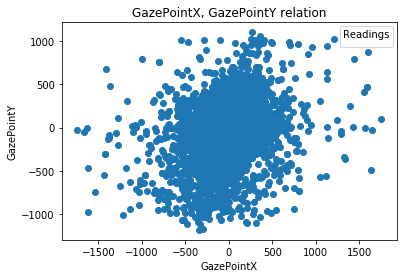

In [42]:
plt.legend(prop={'size': 8}, title = 'Readings')
plt.title('GazePointX, GazePointY relation')
plt.xlabel('GazePointX')
plt.ylabel('GazePointY')
plt.scatter(allData['GazePointX (MCSpx)'],allData['GazePointY (MCSpx)'])

In [ ]:
gazex = readingPassData['GazePointX (MCSpx)']

In [63]:
covmat = np.cov(allData['GazePointX (MCSpx)'],allData['GazePointY (MCSpx)'])
covmat

array([[1919.60645212,  449.84333302],
       [ 449.84333302, 2322.19269335]])

In [64]:
meanx = np.mean(allData['GazePointX (MCSpx)'])
meanx

0.0013950053338439236

In [65]:
meany = np.mean(allData['GazePointY (MCSpx)'])
meany

0.002249261993784546

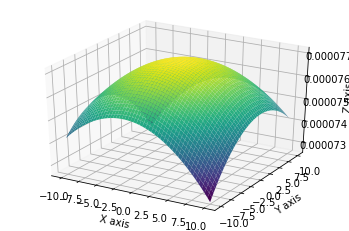

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

#Parameters to set
mu_x = meanx
variance_x = 1919

mu_y = meany
variance_y = 2322

#Create grid and multivariate normal
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], covmat)

#Make a 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

c:\users\zain ul abdeen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in Matplotlib 2.2 and will be removed in 3.1.


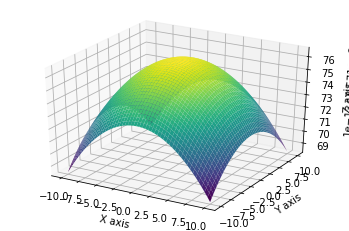

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.mlab import bivariate_normal
from mpl_toolkits.mplot3d import Axes3D

#Parameters to set
mu_x = meanx
sigma_x = 1919

mu_y = meany
sigma_y = 2322

#Create grid and multivariate normal
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
Z = bivariate_normal(X,Y,sigma_x,sigma_y,mu_x,mu_y)

#Make a 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z,cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

In [18]:
readingPassData = readingData[['GazePointX (MCSpx)','GazePointY (MCSpx)']]
skimmingPassData = skimmingData[['GazePointX (MCSpx)','GazePointY (MCSpx)']]
scanningPassData = scanningData[['GazePointX (MCSpx)','GazePointY (MCSpx)']]
unknownPassData = unknownData[['GazePointX (MCSpx)','GazePointY (MCSpx)']]
mediaViewPassData = mediaViewData[['GazePointX (MCSpx)','GazePointY (MCSpx)']]

In [50]:
gaze = allData.loc[(allData['GazePointX (MCSpx)'] >= -50) & 
                                            (allData['GazePointX (MCSpx)'] <= 50), :]

No handles with labels found to put in legend.
c:\users\zain ul abdeen\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


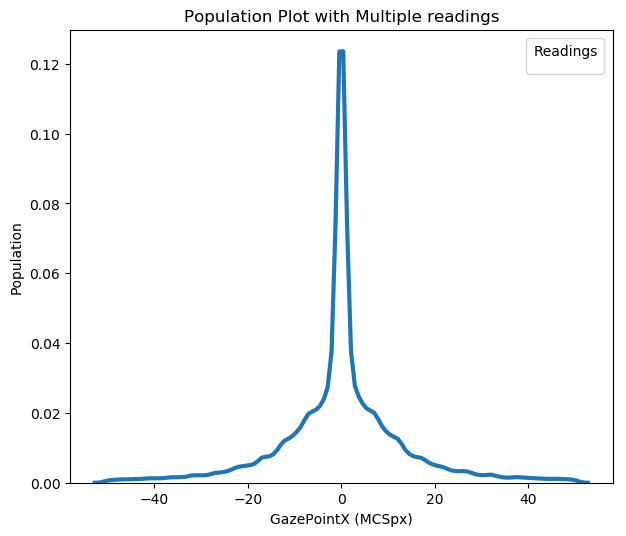

In [53]:
import seaborn as sns
plt.subplots(figsize=(7,6), dpi=100)
plt.legend(prop={'size': 12}, title = 'Readings')
plt.title('Population Plot with Multiple readings')
plt.xlabel('GazePointX')
plt.ylabel('Population')

sns.distplot(gaze['GazePointX (MCSpx)'].sample(frac=0.1),bins=10, hist = False, kde = True, 
                 kde_kws = {'linewidth': 3}
                 )

In [19]:
readPdf = multivariate_normal.pdf(readingPassData, mean=readingMeanVector, cov=readCovMat)
skimmingPdf = multivariate_normal.pdf(skimmingPassData, mean=skimmingMeanVector, cov=skimmingCovMat)
scanningPdf = multivariate_normal.pdf(scanningPassData, mean=scanningMeanVector, cov=scanningCovMat)
unknownPdf = multivariate_normal.pdf(unknownPassData, mean=unknownMeanVector, cov=unknownCovMat)
mediaViewPdf = multivariate_normal.pdf(mediaViewPassData, mean=mediaViewMeanVector, cov=mediaViewCovMat)

# Parameters all files

In [20]:
mypath_all = 'Datasets/Gaze10minData_all/'
mydtaframes_all = {}

for index,files in enumerate(os.listdir(mypath_all)):
    mydtaframes_all["df_{}".format(index)] = pd.read_excel('{}/{}'.format(mypath_all, files),
                                                         sheet_name= 'Sheet1')

In [21]:
mydtaframes_all['df_1'].head()

,ParticipantName,RecordingDuration,RecordingTimestamp,LocalTimeStamp,EyeTrackerTimestamp,MouseEventIndex,MouseEventX (MCSpx),MouseEventY (MCSpx),KeyPressEventIndex,StudioEventIndex,StudioEventIndex_B,StudioEvent,StudioEvent_B,FixationIndex,SaccadeIndex,GazeEventType,GazeEventType_B,GazeEventDuration,FixationPointX (MCSpx),FixationPointY (MCSpx),AbsoluteSaccadicDirection,RelativeSaccadicDirection,GazePointIndex,GazePointX (MCSpx),GazePointY (MCSpx),PupilLeft,PupilRight,ValidityLeft,ValidityRight,StudioEventTypeDiff,GazeEventTypeDiff
0,Proband_31_D2,2895701,440,13:25:24.097,1.458043e+15,NaN,NaN,NaN,NaN,NaN,NaN,0_unstated,0_unstated,NaN,2.0,Saccade,Saccade,133,NaN,NaN,NaN,NaN,21.0,66.0,220.0,"2,74","2,59",0.0,0.0,Agree_0_unstated,Agree_Saccade
1,Proband_31_D2,2895701,456,13:25:24.114,1.458043e+15,NaN,NaN,NaN,NaN,NaN,NaN,0_unstated,0_unstated,NaN,2.0,Saccade,Saccade,133,NaN,NaN,NaN,NaN,22.0,20.0,166.0,"2,59","2,54",0.0,0.0,Agree_0_unstated,Agree_Saccade
2,Proband_31_D2,2895701,473,13:25:24.131,1.458043e+15,NaN,NaN,NaN,NaN,NaN,NaN,0_unstated,0_unstated,2.0,NaN,Fixation,Fixation,200,45.0,168.0,"339,44",NaN,23.0,20.0,168.0,NaN,"2,62",4.0,0.0,Agree_0_unstated,Agree_Fixation
3,Proband_31_D2,2895701,490,13:25:24.147,1.458043e+15,NaN,NaN,NaN,NaN,NaN,NaN,0_unstated,0_unstated,2.0,NaN,Fixation,Fixation,200,45.0,168.0,"339,44",NaN,24.0,36.0,171.0,"2,58","2,50",0.0,0.0,Agree_0_unstated,Agree_Fixation
4,Proband_31_D2,2895701,506,13:25:24.164,1.458043e+15,NaN,NaN,NaN,NaN,NaN,NaN,0_unstated,0_unstated,2.0,NaN,Fixation,Fixation,200,45.0,168.0,"339,44",NaN,25.0,66.0,224.0,"2,74","2,60",0.0,0.0,Agree_0_unstated,Agree_Fixation


In [22]:
studiodf_all = {}

for index,frames in enumerate(mydtaframes_all):
    studiodf_all["{}".format(index)] = mydtaframes_all[frames]
    #studiodf["{}".format(index)] = mydtaframes[frames].loc[(mydtaframes[frames]['StudioEventTypeDiff'] == "Agree_1_Scanning") | (mydtaframes[frames]['StudioEventTypeDiff'] == "Agree_2_Skimming") | (mydtaframes[frames]['StudioEventTypeDiff'] == "Agree_3_Reading"),['LocalTimeStamp','FixationPointX (MCSpx)','FixationPointY (MCSpx)','StudioEventTypeDiff']]
# studiodf = df1.loc[(df1['StudioEventTypeDiff'] == "Agree_1_Scanning") | (df1['StudioEventTypeDiff'] == "Agree_2_Skimming") | (df1['StudioEventTypeDiff'] == "Agree_3_Reading"),['LocalTimeStamp','FixationPointX (MCSpx)','FixationPointY (MCSpx)','StudioEventTypeDiff']]
# studiodf.head()

In [23]:
len(studiodf_all)

20

In [24]:
for frames in studiodf_all:
    studiodf_all[frames].fillna(method='ffill', inplace= True)

In [25]:

allData_all = pd.concat([studiodf_all['0'],studiodf_all['1'],studiodf_all['2'],studiodf_all['3'],studiodf_all['4'],studiodf_all['5'],
                    studiodf_all['6'],studiodf_all['7'],studiodf_all['8'],studiodf_all['9'],studiodf_all['10'],studiodf_all['11'],
                    studiodf_all['12'],studiodf_all['13'],studiodf_all['14'],studiodf_all['15'],studiodf_all['16'],studiodf_all['17'],
                         studiodf_all['18'],studiodf_all['19'],], sort = False)
allData_all['GazePointX (MCSpx)'].fillna(method='bfill', inplace= True)
allData_all['GazePointY (MCSpx)'].fillna(method='bfill', inplace= True)

In [26]:
allData_all['GazePointX (MCSpx)'] = allData_all['GazePointX (MCSpx)'].diff()
allData_all['GazePointY (MCSpx)'] = allData_all['GazePointY (MCSpx)'].diff()
allData_all['GazePointX (MCSpx)'].fillna(method='bfill', inplace= True)
allData_all['GazePointY (MCSpx)'].fillna(method='bfill', inplace= True)


In [27]:
allData_all['GazePointX (MCSpx)'].isna().sum().sum()

0

In [28]:
allData_all['StudioEventTypeDiff'].unique()

array(['Agree_0_unstated', 'Disagree_5_Unknown_0_unstated',
       'Disagree_5_Unknown_3_Reading', 'Disagree_1_Scanning_3_Reading',
       'Disagree_1_Scanning_5_Unknown', 'Agree_5_Unknown',
       'Disagree_5_Unknown_1_Scanning', 'Agree_1_Scanning',
       'Agree_3_Reading', 'Disagree_1_Scanning_2_Skimming',
       'Disagree_5_Unknown_2_Skimming', 'Agree_2_Skimming',
       'Disagree_1_Scanning_4_MediaView',
       'Disagree_2_Skimming_1_Scanning', 'Disagree_2_Skimming_5_Unknown',
       'Disagree_2_Skimming_3_Reading', 'Disagree_5_Unknown_4_MediaView',
       'Agree_4_MediaView', 'Disagree_4_MediaView_1_Scanning',
       'Disagree_0_unstated_3_Reading', 'Disagree_3_Reading_1_Scanning',
       'Disagree_3_Reading_2_Skimming', 'Disagree_2_Skimming_4_MediaView',
       'Disagree_3_Reading_4_MediaView',
       'Disagree_4_MediaView_2_Skimming',
       'Disagree_4_MediaView_5_Unknown', 'Disagree_3_Reading_5_Unknown',
       'Disagree_1_Scanning_0_unstated', 'Disagree_0_unstated_5_Unknown'

In [29]:
import matplotlib.pyplot as plt

In [30]:
from IPython.display import display

In [31]:
readingData_all = allData_all.loc[allData_all['StudioEventTypeDiff'] == "Agree_3_Reading"]
skimmingData_all = allData_all.loc[allData_all['StudioEventTypeDiff'] == "Agree_2_Skimming"]
scanningData_all = allData_all.loc[allData_all['StudioEventTypeDiff'] == "Agree_1_Scanning"]
unknownData_all = allData_all.loc[allData_all['StudioEventTypeDiff'] == "Agree_5_Unknown"]
mediaViewData_all = allData_all.loc[allData_all['StudioEventTypeDiff'] == "Agree_4_MediaView"]

In [32]:
readingData_all['GazePointY (MCSpx)'].isna().sum().sum()

0

In [33]:
readingData_all.head()

,ParticipantName,RecordingDuration,RecordingTimestamp,LocalTimeStamp,EyeTrackerTimestamp,MouseEventIndex,MouseEventX (MCSpx),MouseEventY (MCSpx),KeyPressEventIndex,StudioEventIndex,StudioEventIndex.1,StudioEvent,StudioEvent_B,FixationIndex,SaccadeIndex,GazeEventType,GazeEventType_B,GazeEventDuration,FixationPointX (MCSpx),FixationPointY (MCSpx),AbsoluteSaccadicDirection,RelativeSaccadicDirection,GazePointIndex,GazePointX (MCSpx),GazePointY (MCSpx),PupilLeft,PupilRight,ValidityLeft,ValidityRight,StudioEventTypeDiff,GazeEventTypeDiff,StudioEventIndex_B,StudioEventIndex_B.1,Unnamed: 11
4691,Proband_30_D1,3520531,77615,14:47:02.446,1.457961e+15,14.0,364.0,13.0,52.0,8.0,8.0,3_Reading,3_Reading,206.0,410.0,Fixation,Fixation,250,162.0,451.0,"348,49","172,21",4640.0,0.0,0.0,"2,25","2,43",0.0,0.0,Agree_3_Reading,Agree_Fixation,NaN,NaN,NaN
4692,Proband_30_D1,3520531,77629,14:47:02.460,1.457961e+15,14.0,364.0,13.0,52.0,8.0,8.0,3_Reading,3_Reading,206.0,410.0,Fixation,Fixation,250,162.0,451.0,"348,49","172,21",4641.0,2.0,-1.0,"2,29","2,43",0.0,0.0,Agree_3_Reading,Agree_Fixation,NaN,NaN,NaN
4693,Proband_30_D1,3520531,77645,14:47:02.476,1.457961e+15,14.0,364.0,13.0,52.0,8.0,8.0,3_Reading,3_Reading,206.0,410.0,Fixation,Fixation,250,162.0,451.0,"348,49","172,21",4642.0,-6.0,21.0,"2,26","2,41",0.0,0.0,Agree_3_Reading,Agree_Fixation,NaN,NaN,NaN
4694,Proband_30_D1,3520531,77662,14:47:02.493,1.457961e+15,14.0,364.0,13.0,52.0,8.0,8.0,3_Reading,3_Reading,206.0,410.0,Fixation,Fixation,250,162.0,451.0,"348,49","172,21",4643.0,11.0,-20.0,"2,24","2,39",0.0,0.0,Agree_3_Reading,Agree_Fixation,NaN,NaN,NaN
4695,Proband_30_D1,3520531,77679,14:47:02.510,1.457961e+15,14.0,364.0,13.0,52.0,8.0,8.0,3_Reading,3_Reading,206.0,410.0,Fixation,Fixation,250,162.0,451.0,"348,49","172,21",4644.0,0.0,6.0,"2,28","2,41",0.0,0.0,Agree_3_Reading,Agree_Fixation,NaN,NaN,NaN


In [34]:
readCovMat_all = np.cov((readingData_all['GazePointX (MCSpx)'],readingData_all['GazePointY (MCSpx)']))
skimmingCovMat_all = np.cov((skimmingData_all['GazePointX (MCSpx)'],skimmingData_all['GazePointY (MCSpx)']))
scanningCovMat_all = np.cov((scanningData_all['GazePointX (MCSpx)'],scanningData_all['GazePointY (MCSpx)']))
unknownCovMat_all = np.cov((unknownData_all['GazePointX (MCSpx)'],unknownData_all['GazePointY (MCSpx)']))
mediaViewCovMat_all = np.cov((mediaViewData_all['GazePointX (MCSpx)'],mediaViewData_all['GazePointY (MCSpx)']))

display(readCovMat_all)
display(skimmingCovMat_all)
display(scanningCovMat_all)
display(unknownCovMat_all)
display(mediaViewCovMat_all)

array([[1219.36119249,  132.08377548],
       [ 132.08377548,  708.32083509]])

array([[1729.46174858,  213.14434616],
       [ 213.14434616, 3865.69122351]])

array([[1925.199349  ,  255.68209493],
       [ 255.68209493, 1631.86858628]])

array([[2134.70523252,  692.36575501],
       [ 692.36575501, 2710.03012675]])

array([[1588.30018404, -328.80130858],
       [-328.80130858, 1247.88343492]])

In [35]:
readingMeanx_all = readingData_all['GazePointX (MCSpx)'].mean()
readingMeany_all = readingData_all['GazePointY (MCSpx)'].mean()
readingMeanVector_all = [readingMeanx_all,readingMeany_all]

skimmingMeanx_all = skimmingData_all['GazePointX (MCSpx)'].mean()
skimmingMeany_all = skimmingData_all['GazePointY (MCSpx)'].mean()
skimmingMeanVector_all = [skimmingMeanx_all,skimmingMeany_all]

scanningMeanx_all = scanningData_all['GazePointX (MCSpx)'].mean()
scanningMeany_all = scanningData_all['GazePointY (MCSpx)'].mean()
scanningMeanVector_all = [scanningMeanx_all,scanningMeany_all]

unknownMeanx_all = unknownData_all['GazePointX (MCSpx)'].mean()
unknownMeany_all = unknownData_all['GazePointY (MCSpx)'].mean()
unknownMeanVector_all = [unknownMeanx_all,unknownMeany_all]

mediaViewMeanx_all = mediaViewData_all['GazePointX (MCSpx)'].mean()
mediaViewMeany_all = mediaViewData_all['GazePointY (MCSpx)'].mean()
mediaViewMeanVector_all = [mediaViewMeanx_all,mediaViewMeany_all]

display(readingMeanVector_all)
display(skimmingMeanVector_all)
display(scanningMeanVector_all)
display(unknownMeanVector_all)
display(mediaViewMeanVector_all)


[0.04776158969657473, 0.07900986380656777]

[0.31418546774917383, -0.7167802211252091]

[-0.01577395138226883, -0.026021806482364157]

[-0.036332538613040324, 0.09393248332815038]

[-1.0391618000687048, 0.15080728272071453]